<h1><center><font color='red'>PROYECTO FINAL  APRENDIZAJE AUTOMÁTICO</font></center></h1>
<h1><center>¿Me puedo comer ese champiñon?</center></h1>

# <font size="4">Alumnos: Gonzalo Guzmán del Río y Alejandro Ortega Álvarez</font>

El objetivo de este proyecto será el de conseguir o llegar a aprender que características, hacen que unos champiñones u otros sean venenosos o no, y por tanto no aptos para consumo. Para llegar a estos "conocimientos" se llevarán a cabo diferentes algoritmos de Aprendizaje Automático, que nos permitirán llegar a clasificar si un champiñon es potencialmente peligroso o no. 
Para el tratado de datos se partirá de un dataset "contenido" en la página <a href="https://www.kaggle.com/uciml/mushroom-classification">Kaggle.com</a>. Este dataset contiene alrededor de 23 características como:
- Forma del gorro.
- Color del gorro.
- Entorno.
- Densidad.

Además de estos campos, cada muestra de ejemplo se identificará como Venenosa o Comestible.

Por tanto, nuestras pregunta es:
- ¿Qué tipos de modelos de aprendizaje automático se ajustan más a este dataset?

A continuación desarrollaremos diferentes técnicas de Machine Learning como **regresión logística, redes neuronales o SVM (Support Vector Machines)**.

Para ello, en primer lugar, para ponernos en contexto, queríamos conocer cuál era el número real de muestras de ejemplo que teníamos para trabajar. Para un mejor conocimiento, decidimos representar en un gráfico de barras la cantidad de muestras venenosas y comestibles que había.
<img src="poisonous and edibles.png">

Como se puede observar, la cantidad de muestras comestibles supera ligeramente, lo que nos da a entender, que la probabilidad de que una seta sea venonosa, es inferior a que sea comestible.


Una vez vista esta representación, también nos pareció interesante, seleccionar algunas características de las muestras, para comparar entre venenosas y comestibles, como:
- Cap-shape (Forma de la gorro)

<img src="comparison1.png">


**Como podemos comprobar, en cuanto a la forma del gorro, en las setas comestibles predominan las formas convexas y planas frente a las muestras venenosas, mientras que estas, tienden a tener formas más "enredadas" que las muestras comestibles.**

- Cap-color (Color del gorro)

<img src="comparison2.png">


**Respecto al color del gorro, en las setas que son aptas para el consumo, predominan los colores típicos de una seta, como el marrón. Sin embargo, el color rojo, con el que se suele representar a una seta, predomina en las muestras no aptas para el consumo.**

- Odor (Sabor)

<img src="comparison3.png">

**La mayoría de las setas comestibles, tienden a ser insulsas, poco sabrosas, sin embargo, también hay sabores como el almendrado, o anisado. En las muestras venenosas, predomina el sabor a tierra, sucio.**

- Stalk-color-above-ring (Color del tallo)

<img src="comparison4.png">

**Si queremos conocer por el tallo si una seta es venenosa o no, tendremos que fijarnos sobre todo en el blanco y en el rosa. La mayor parte de muestras comestibles tienen un tallo blanco o gris, sin embargo, las muestras venenosas, aparte de poder tener el tallo blanco, también podría ser rosa.**
- Spore-print-color (Color de las esporas)

<img src="comparison5.png">


**Finalmente, en cuanto al color de las esporas, en las setas venenosas predomina el color blanco, mientras que en las muestras comestibles, predomina el marrón.**

Después de este pequeño análisis, llevaremos a cabo las técnicas de aprendizaje automático, especificadas más arriba, para poder llegar a intuir, o predecir, que técnica nos permitirá saber con más certeza si una seta es venenosa o no.


**REGRESIÓN LOGÍSTICA**:

En regresión logística hemos llevado a cabo las operaciones ya conocidas, del cálculo del gradiente, sigmoide y coste, regularizados, para llegar a conseguir las thetas óptimas que nos permitan predecir con acierto, el **99%** de las veces si una seta es venenosa o no. El tiempo que ha llevado consigo la obtención de thetas óptimas ha sido de 0.5 segundos. Por tanto, obtenemos un buen resultado.


**REDES NEURONALES**:

Para las redes neuronales también hemos calculado sus respectivos métodos de derivada de la sigmoide, cálculo del gradiente a partir de la propagación hacia atrás, pasándole a cada nodo su respectivo error anterior. Para ello se crean casos de entrenamiento que se utilizarán en la propagación hacia atrás, lo cuál nos permitirá obtener, las thetas óptimas. En las redes neuronales este proceso es más lento, debido a las iteraciones que tiene que realizar (especificadas en la función optimize). Tarda alrededor de 20 minutos, con un porcentaje de acierto del **96%**


**SVM (SUPPORT VECTOR MACHINES)**:

Por último utilizaremos un clasificador SVM(Conjunto de algoritmos de aprendizaje supervisado). Utilizaremos tanto el "modo" **lineal** como el "modo" **Gaussiano**. En el entrenamiento del modo lineal obtenemos un tiempo de 0.05 segundos y un porcentaje de acierto del **99%**. En el SVM Gaussiano obtenemos un tiempo de 0.12 segundos, y un porcentaje de éxito de 99% también.


Finalmente obtenemos la siguiente gráfica en cuanto a comparación de tiempos:
(logistic regression, neural networks, svm lineal, svm gaussian)

<img src="successcomparison.png">

# ANEXO

Aquí podemos encontrar el código utilizado para el desarrollo del proyecto

# READING VALUES

In [14]:
# IMPORTS (Temporal: Irán aumentando a medida que las vayamos necesitando)
import numpy as np
import time
import pandas as pd
from pandas import DataFrame
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm

def carga_csv(file_name):
    values = read_csv(file_name).values
    return values

values = carga_csv("mushrooms.csv")

print("Read values:\n", values, "\n\n\n\n")

#Características seleccionadas de todas las muestras
features = values[:, [1, 3, 5, 14, 20]]
print("Features:\n", features, "\n\n")
#Pasamos los datos a formato tabla
dataFeatures = DataFrame(features)
#Características a tener en cuenta
dataFeatures.columns = ['cap-shape', 'cap-color', 'odor', 'stalk-color-above-ring', 'spore-print-color']
print("Features in table format:\n", dataFeatures, "\n\n\n\n")

#Clase de cada una de las muestras (Venenosa o comestible)
mushroomClasses = values[:, 0]
print("Classes:\n", mushroomClasses, "\n\n")
dataClasses = DataFrame(mushroomClasses)
dataClasses.columns = ['class']
print("Classes in table format:\n", dataClasses, "\n\n\n\n")

#Aquí guardaremos los tiempos para mostrar en la gráfica final. Tamaño 4, ya que son
#los 4 modelos diferentes que tenemos
models_times = np.arange(4, dtype = float)

Read values:
 [['p' 'x' 's' ... 'k' 's' 'u']
 ['e' 'x' 's' ... 'n' 'n' 'g']
 ['e' 'b' 's' ... 'n' 'n' 'm']
 ...
 ['e' 'f' 's' ... 'b' 'c' 'l']
 ['p' 'k' 'y' ... 'w' 'v' 'l']
 ['e' 'x' 's' ... 'o' 'c' 'l']] 




Features:
 [['x' 'n' 'p' 'w' 'k']
 ['x' 'y' 'a' 'w' 'n']
 ['b' 'w' 'l' 'w' 'n']
 ...
 ['f' 'n' 'n' 'o' 'b']
 ['k' 'n' 'y' 'w' 'w']
 ['x' 'n' 'n' 'o' 'o']] 


Features in table format:
      cap-shape cap-color odor stalk-color-above-ring spore-print-color
0            x         n    p                      w                 k
1            x         y    a                      w                 n
2            b         w    l                      w                 n
3            x         w    p                      w                 k
4            x         g    n                      w                 n
...        ...       ...  ...                    ...               ...
8119         k         n    n                      o                 b
8120         x         n    n       

# HOW MANY EDIBLE OR POISONOUS MUSHROOMS DO WE HAVE?

8124


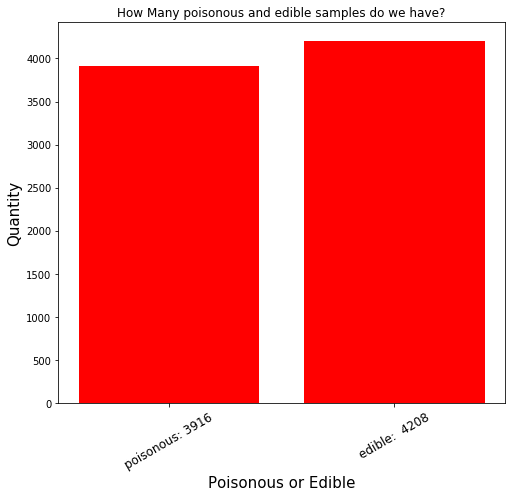

In [15]:
#Representamos la cantidad de muestras de ejmplo que son comestibles y venenosas 0:Edible, 1:Poisonous
print(len(dataClasses))
edible = []
poisonous = []

for cl in mushroomClasses:
    if cl=='e':
        edible.append(cl)
    else:
        poisonous.append(cl)

xBars = ['poisonous: ' + str(len(poisonous)), 'edible:  ' + str(len(edible))]        
ancho = 0.8
fig, ax = plt.subplots(figsize=(8,7))
index = np.arange(len(xBars))
plt.bar(index, [len(poisonous), len(edible)], ancho, color='red')
plt.xlabel('Poisonous or Edible', fontsize=15)
plt.ylabel('Quantity', fontsize=15)
plt.xticks(index, xBars, fontsize=12, rotation=30)
plt.title('How Many poisonous and edible samples do we have?')
plt.savefig('poisonous and edibles.png')
#Mayor número de muestras comestibles que venenosas, como se puede observar en la gráfica

# COMPARING FEATURES

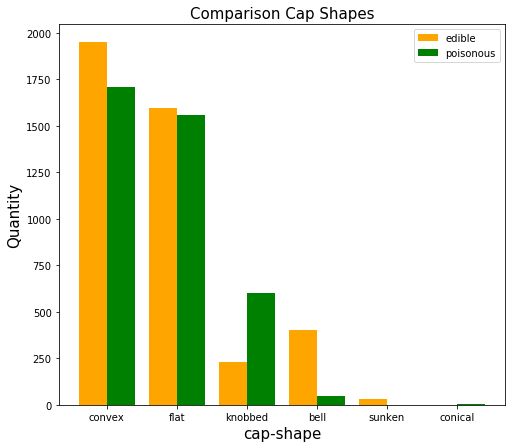

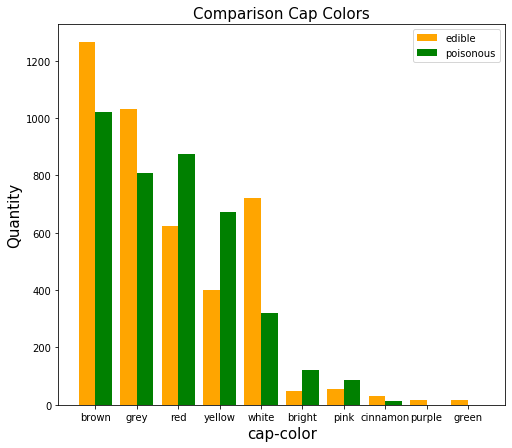

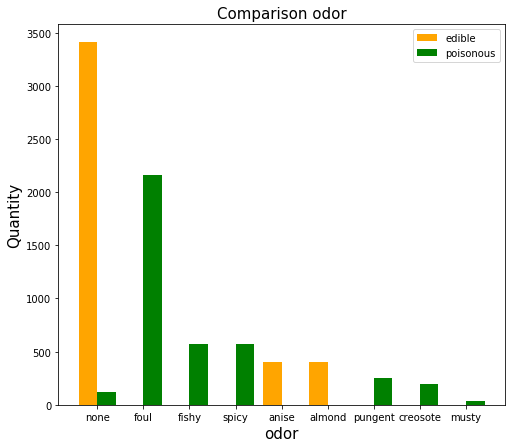

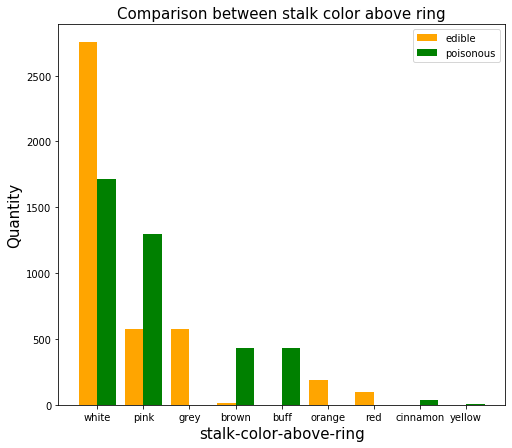

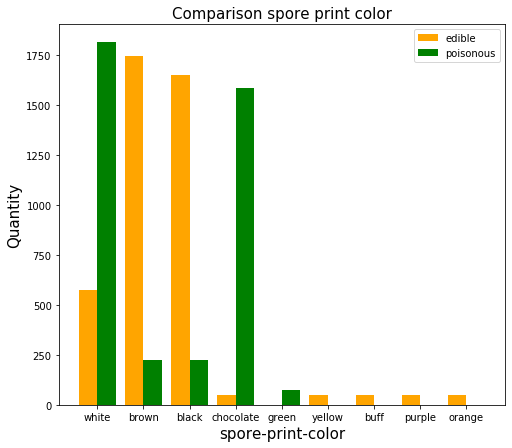

In [16]:
i = 0
def drawCompareGraphic(feature, title, ticklabels):
    global i
    #Guardamos la cantidad de champiñones que hay en cada tipo de forma de gorra
    shape_cap = dataFeatures[feature].value_counts()
    #Tenemos cada una de las etiquetas de la "características"
    shape_labels = shape_cap.axes[0].tolist()

    inde = np.arange(len(shape_labels))

    poisonousShape = []
    edibleShape = []

    for shape in shape_labels:
        quantity = len(dataFeatures[dataFeatures[feature] == shape].index)
        edibles = len(dataFeatures[(dataFeatures[feature] == shape) & (dataClasses['class'] == 'e')].index)
        edibleShape.append(edibles)
        poisonousShape.append(quantity-edibles)

    ancho = 0.4
    fig, ax = plt.subplots(figsize=(8,7))
    ax.bar(inde, edibleShape, ancho, color='orange')
    ax.bar(inde+ancho, poisonousShape, ancho, color='green')

    ax.set_xlabel(feature, fontsize = 15)
    ax.set_ylabel('Quantity',fontsize=15)  
    ax.set_title(title,fontsize=15)
    ax.set_xticks(inde+ancho/2)
    ax.set_xticklabels(ticklabels, fontsize=10)
    ax.legend(['edible', 'poisonous'])
    i = i + 1
    plt.savefig('comparison' + str(i) + '.png')

drawCompareGraphic('cap-shape', 'Comparison Cap Shapes', ('convex', 'flat', 'knobbed', 'bell', 'sunken', 'conical'))
drawCompareGraphic('cap-color', 'Comparison Cap Colors', ('brown', 'grey', 'red', 'yellow', 'white', 'bright', 
                                                         'pink', 'cinnamon', 'purple', 'green'))
drawCompareGraphic('odor', 'Comparison odor', ('none', 'foul', 'fishy', 'spicy', 'anise', 'almond', 'pungent',
                                              'creosote', 'musty'))
drawCompareGraphic('stalk-color-above-ring', 'Comparison between stalk color above ring', ('white', 'pink', 'grey', 'brown', 'buff', 
                                                                                          'orange', 'red', 'cinnamon', 'yellow'))
drawCompareGraphic('spore-print-color', 'Comparison spore print color', ('white', 'brown', 'black', 'chocolate', 
                                                                        'green', 'yellow', 'buff', 'purple', 'orange'))

# SPLITTING DATA

In [17]:
#Para no tratar con valores alfabéticos, transformaremos todos los datos, a valores numéricos
labelEncode = preprocessing.LabelEncoder()

#Convertimos los valores de las estadísticas a valores numéricos
#Formato tabla que nos indica si en una posición hay un valor, con 0-1
XArr = pd.get_dummies(dataFeatures).values

#Igual para las clases (1:poisonous, 0:edible)
YArr = labelEncode.fit_transform(dataClasses.values.ravel())

# LOGISTIC REGRESSION

In [18]:
m = len(YArr)

#La función sigmoide es la función h, la hipótesis
def sigmoide(value):
    s = 1/(1+np.exp(-value))
    return s

#FUNCIÓN DE COSTE
def coste(O, X, Y):
    H = sigmoide(np.dot(X,O))
    logH = np.log(H)
    logHT = logH.T
    logAux = np.log((1- H))
    logAuxT = logAux.T
    YT = Y.T
    sumatorio = (-1/m)* (np.dot(YT, logH) + np.dot((1-YT), logAux))
    return sumatorio
    
#FUNCIÓN DE GRADIENTE
def gradiente(O, X, Y):
    return (X.T.dot((sigmoide(X.dot(O))) - Y))/m

#FUNCIÓN DE COSTE REGULARIZADA (lambda)
def coste2(O, X, Y, lam):
    sol = (coste(O, X, Y) + (lam/(2*m))*(O**2).sum())
    return sol
   
#FUNCIÓN DE GRADIENTE REGULARIZADA (lambda)
def gradiente2(O, X, Y, lam):
    AuxO = np.hstack([np.zeros([1]), O[1:,]])
    return (((X.T.dot(sigmoide(X.dot(O))-Y))/m) 
    + (lam/m)*O)

XArr2 = XArr.copy()
XArr2 = np.insert (XArr2 ,0, 1, axis = 1)
print("FEATURES SHAPE:" ,XArr.shape)
print("FEATURES SHAPE WITH 1s column:" , XArr2.shape)
start = time.time()
thetas = np.ones(len(XArr2[0]))
result = opt.fmin_tnc(func = coste2, x0 = thetas, fprime = gradiente2, args = (XArr2, YArr, 0.1))
thetas_opt = result[0]
end = time.time()
print("EXECUTION TIME:", end - start, "seconds")
print("OPT THETAS:\n", thetas_opt)


#Evaluación de los resultados obtenidos en las predicciones con las thetas óptimas
def evalua(thetas, X, y):
    thetasMat = np.matrix(thetas)   
    z = np.dot(thetasMat,X.transpose())
    resultados = sigmoide(z)
    resultados[resultados >= 0.5] = 1
    resultados[resultados < 0.5] = 0
    admitidosPred = sum(np.where(resultados == y)).shape[0]
    return (admitidosPred / len(y)) * 100
prediction = evalua(thetas_opt, XArr2, YArr)
models_times[0] = (prediction)
print(models_times)
print("PREDICTIONS RESULT:",prediction)

FEATURES SHAPE: (8124, 43)
FEATURES SHAPE WITH 1s column: (8124, 44)
EXECUTION TIME: 0.45924997329711914 seconds
OPT THETAS:
 [ 1.71355639  0.02810828  3.97751649 -0.44971542 -0.65236852 -0.18312227
 -0.98326982 -0.47907426 -1.36723764 -0.25879517 -1.49357069  2.08382534
 -0.44813295 -0.91564068 -0.91564068  0.24676265  5.25373015 -9.40016354
  8.11965001  6.25341628 -9.40016349  1.46056263 -7.84176175  6.75190359
  2.87435438  2.8743543   0.77792492  1.46056263 -2.30927442 -0.33521967
 -0.99371745 -1.70237555  1.32746628  1.13712697  2.32206642 -0.55937112
  1.43159863 -3.68742336 -3.73062053 -0.55937112  9.79031306 -2.5593953
  2.16318599 -0.55937112]
[99.72919744  1.          2.          3.        ]
PREDICTIONS RESULT: 99.72919743968488


# NEURAL NETWORKS

In [23]:
def sigmoide(values): 
    return 1/(1+np.exp(-(values)))


def dSigmoide(values): 
    return sigmoide(values) * (1 - sigmoide(values))


def h0(X, theta1, theta2):     
    a = np.insert(X, 0, 1, axis=1) 
    aa = np.dot(a,theta1.T)
    afs = sigmoide(aa)
    aadd = np.insert(afs, 0, 1, axis = 1)
    a2dot = np.dot(aadd,theta2.T)
    a2fs = sigmoide(a2dot) 
    return a2fs

def pesosAleatorios(L_in, L_out):
    Eini = 0.12
    return np.random.uniform(-Eini, Eini, [L_out, 1 + L_in])
    

def coste(theta1, theta2, X, y, reg):
    J = np.sum(-y * np.log(h0(X, theta1, theta2))-(1-y)*np.log(1-h0(X, theta1, theta2)))/len(y)
    return J

def costeReg(theta1, theta2, X, y, reg):
    thetaAux1 = np.delete(theta1, 0, 1)
    thetaAux2 = np.delete(theta2, 0, 1)
    regularized = (reg / (2*len(X))) * (sum(sum(np.power(thetaAux1, 2))) + sum(sum(np.power(thetaAux2, 2))))
    return coste(theta1, theta2, X, y, reg) + regularized 

def gradiente(theta1, theta2, X, y, reg):
    
    a1 = np.insert(X, 0, 1, axis=1) 
    z2 = np.dot(a1, theta1.T)

    a2 = sigmoide(z2)
    a2 = np.insert(a2, 0, 1, axis = 1)
    z3 = np.dot(a2,theta2.T)
    a3 = sigmoide(z3)
    
    d3 = np.max(a3) - y
    d2 = np.delete(np.dot(d3, theta2), 0, 1) * dSigmoide(z2)

    A1 = np.dot(d2.T, a1)
    A2 = np.dot(d3.T, a2)
    
    A1 = A1 / len(X)
    A2 = A2 / len(X)
    return A1, A2

def gradienteReg(theta1, theta2, X, y, reg):
    A1, A2 = gradiente(theta1, theta2, X ,y, reg)
    reg1 = (reg / len(y)) * theta1
    reg2 = (reg / len(y)) * theta2
    
    reg1[:,:1]=0
    reg2[:,:1]=0
    
    A1reg = A1.copy()
    A2reg = A2.copy()
    A1reg += reg1
    A2reg += reg2
    
    return A1reg,A2reg
     
def backprop (params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
    thetaAux1 = np.reshape(params_rn[:num_ocultas * (num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    thetaAux2 = np.reshape(params_rn[num_ocultas * (num_entradas + 1):], (num_etiquetas, (num_ocultas + 1)))
    costt = coste(thetaAux1, thetaAux2, X, y, reg)
    gradd1 ,gradd2 = gradiente(thetaAux1, thetaAux2, X, y, reg)
    gradd = np.concatenate((np.ravel(gradd1),np.ravel(gradd2)))
    gradd.resize(1)
    return gradd

def backpropReg (params_rn, num_entradas, num_ocultas, num_etiquetas, X, y, reg):
    thetaAux1 = np.reshape(params_rn[:num_ocultas * (num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    thetaAux2 = np.reshape(params_rn[num_ocultas * (num_entradas + 1):], (num_etiquetas, (num_ocultas + 1)))
    costt = costeReg(thetaAux1, thetaAux2, X, y, reg)
    gradd1 ,gradd2 = gradienteReg(thetaAux1, thetaAux2, X, y, reg)
    gradd = np.concatenate((np.ravel(gradd1),np.ravel(gradd2)))
    return costt

XNN = XArr.copy()
YNN = YArr.copy()


#Creación de casos de entrenamiento aleatorios para las redes neuronales
X_Train, X_test, Y_Train, Y_test = train_test_split(XNN, YNN, test_size=0.33, random_state=42)

print(Y_Train.ndim)
Y_Train = np.expand_dims(Y_Train, axis = 1)
print(Y_Train.ndim)


#Creación de las etiquetas necesarias
tags = np.zeros((len(Y_Train), 2))
for i in range(len(Y_Train)):
    tags[i][Y_Train[i]] = 1
    
#Empezamos "entrenamiento"
start = time.time()

print("STARTED")

#Inicializamos theta con pesos aleatorios
theta1 = pesosAleatorios(X_Train.shape[1], 10)
theta2 = pesosAleatorios(10, 2)
thetaVec = np.append(theta1, theta2).reshape(-1)

#Obtención de las thetas óptimas
result = opt.minimize(fun=backpropReg, x0=thetaVec, args=(43, 10, 2, X_Train, tags, 0))
thetas_opt = result.x
end = time.time()

print("FINISHED")

print("EXECUTION TIME:", end - start, "seconds")

1
2
STARTED


C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\Gonzalo\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


FINISHED
EXECUTION TIME: 1123.7504136562347 seconds


In [24]:
#Reestablecemos theta para la evalución de resultados
theta1 = np.reshape(result.x[:10*(43 + 1)], (10, (43+1)))
theta2 = np.reshape(result.x[10*(43+1):], (2, (10+1)))

def evalua(results, Y):
    numAciertos = 0
    for i in range(results.shape[0]):
        result = np.argmax(results[i])
        if result == Y[i]: numAciertos += 1  
    return (numAciertos/(results.shape[0]))*100

pred = evalua(h0(X_test, theta1, theta2), Y_test)
models_times[1] = (pred)
print("PREDICTIONS NEURAL NETWORK RESULT:", pred)

PREDICTIONS NEURAL NETWORK RESULT: 95.97165236851922


# SUPPORT VECTOR MACHINES

**SVM LINEAL**

In [25]:
XSvm = XArr.copy()
YSvm = YArr.copy()

X_Train, X_test, Y_Train, Y_test = train_test_split(XSvm, YSvm, test_size=0.33, random_state=42)

print("X TRAIN:\n", X_Train)
print("\nX TEST:\n", X_test)
print("\nY TRAIN:\n", Y_Train)
print("\nY TEST:\n", Y_test)

#SVM de tipo lineal
svmLineal = svm.SVC(C=1, kernel='linear')

#Entrenamiento de las "redes". Similar a buscar las thetas óptimas
start = time.time()
print("\n TRAINING STARTED")
svmFitted = svmLineal.fit(X_Train, Y_Train)
print("\nSVM TRAINED SHAPE:",svmFitted)
end = time.time()
print("\n TRAINING FINISHED")
print("\n TRAINING EXECUTION TIME:", end - start, "seconds")
#predecimos Y a partir de la x "entrenada"
predictY = svmLineal.predict(X_test)

def evalua(results, Y):
    numAciertos = 0
    for i in range(len(Y_test)):
        if results[i] == Y[i]: numAciertos += 1  
    return (numAciertos/(len(Y_test)))*100

print("\nY PREDICTED SHAPE:",predictY.shape, "       TEST Y SHAPE:", Y_test.shape)
success = evalua(predictY, Y_test)
models_times[2] = success
print("\nPREDICTIONS SVM LINEAL",success)

X TRAIN:
 [[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]

X TEST:
 [[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]

Y TRAIN:
 [0 1 0 ... 0 1 0]

Y TEST:
 [0 1 1 ... 0 0 0]

 TRAINING STARTED

SVM TRAINED SHAPE: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

 TRAINING FINISHED

 TRAINING EXECUTION TIME: 0.043883562088012695 seconds

Y PREDICTED SHAPE: (2681,)        TEST Y SHAPE: (2681,)

PREDICTIONS SVM LINEAL 99.58970533383066


**SVM GAUSSIANO**

In [26]:
#SVM 


XSvmG = XArr.copy()
YSvmG = YArr.copy()

X_Train, X_test, Y_Train, Y_test = train_test_split(XSvmG, YSvmG, test_size=0.33, random_state=42)
print("X TRAIN:\n", X_Train)
print("\nX TEST:\n", X_test)
print("\nY TRAIN:\n", Y_Train)
print("\nY TEST:\n", Y_test)

C=1
sigma = 0.1
svmGauss = svm.SVC(C = C, kernel = 'rbf', gamma = 1/(2*sigma **2))

start = time.time()
print("\n TRAINING STARTED")
svmGaussFitted = svmGauss.fit(X_Train, Y_Train)
print("\nSVM TRAINED SHAPE:",svmGaussFitted)
end = time.time()
print("\n TRAINING FINISHED")
print("\n TRAINING EXECUTION TIME:", end - start, "seconds")
predictY = svmGauss.predict(X_test)
print("\nY PREDICTED SHAPE:",predictY.shape, "       TEST Y SHAPE:", Y_test.shape)

def evalua(results, Y):
    numAciertos = 0
    for i in range(len(Y_test)):
        if results[i] == Y[i]: numAciertos += 1  
    return (numAciertos/(len(Y_test)))*100

success = evalua(predictY, Y_test)
models_times[3] = success
print("\nPREDICTIONS SVM GAUSS",success)

X TRAIN:
 [[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]

X TEST:
 [[0 0 1 ... 0 0 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]

Y TRAIN:
 [0 1 0 ... 0 1 0]

Y TEST:
 [0 1 1 ... 0 0 0]

 TRAINING STARTED

SVM TRAINED SHAPE: SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

 TRAINING FINISHED

 TRAINING EXECUTION TIME: 0.12669897079467773 seconds

Y PREDICTED SHAPE: (2681,)        TEST Y SHAPE: (2681,)

PREDICTIONS SVM GAUSS 99.66430436404326


# Comparación de eficacia

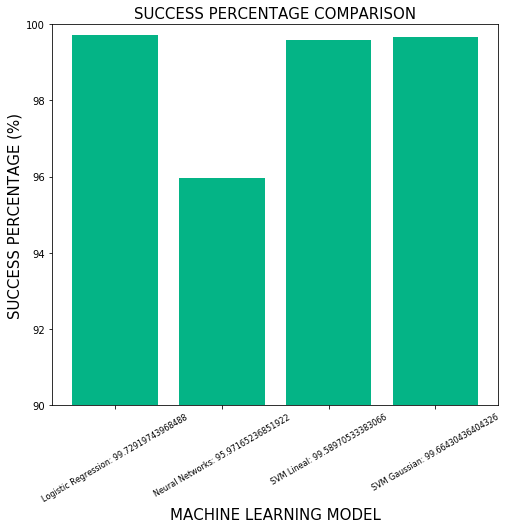

In [27]:
xBars = ['Logistic Regression: ' + str(models_times[0]), 
         'Neural Networks: ' + str(models_times[1]), 
         'SVM Lineal: ' + str(models_times[2]), 
         'SVM Gaussian: ' + str(models_times[3])]        
ancho = 0.8
fig, ax = plt.subplots(figsize=(8,7))
index = np.arange(len(xBars))
plt.bar(index, [models_times[0], models_times[1], models_times[2], models_times[3]], ancho, color='#04B486')
plt.xlabel('MACHINE LEARNING MODEL', fontsize=15)
plt.ylabel('SUCCESS PERCENTAGE (%)', fontsize=15)
plt.xticks(index, xBars, fontsize=8, rotation=30)
plt.title('SUCCESS PERCENTAGE COMPARISON', fontsize=15)
plt.ylim((90, 100))
plt.savefig('successcomparison.png')